In [1]:
import pickle as pkl
from QAOAUtils import *
from tqdm import tqdm
from tqdm.contrib import itertools
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec

(CVXPY) Oct 29 08:36:04 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [2]:
DATA = pkl.load( open ("RandomQUBOFullTest.p", "rb") )
PSC_DATA = pkl.load( open ("PSCRandomQUBOFullTest.p", "rb") )
depth_DATA= pkl.load( open ("RandomQUBODepth0Test.p", "rb") )
PSC_DATA50 = pkl.load( open ("PSCRandomQUBOFullTest50.p", "rb") )
with open("DistancesRandomQUBO_cont.p", "rb") as file:
    results_cont = pkl.load(file)
VDISTANCE50_cont = results_cont["VDISTANCE50_cont"]
DISTANCE50_cont = results_cont["DISTANCE50_cont"]
VDISTANCE10_cont = results_cont["VDISTANCE10_cont"]
DISTANCE10_cont = results_cont["DISTANCE10_cont"]
with open("DistancesRandomQUBO_disc.p", "rb") as file:
    results_disc = pkl.load(file)
VDISTANCE50_disc = results_disc["VDISTANCE50_disc"]
DISTANCE50_disc = results_disc["DISTANCE50_disc"]
VDISTANCE10_disc = results_disc["VDISTANCE10_disc"]
DISTANCE10_disc = results_disc["DISTANCE10_disc"]

In [3]:
idx_list = np.linspace(50,950,10,dtype='int')
M_list= [depth_DATA[2][i][-1] for i in idx_list]+[depth_DATA[6][i][-1] for i in idx_list]
A_list = [depth_DATA[3][i] for i in idx_list] + [depth_DATA[7][i] for i in idx_list]
idx_dict = {'Continous':[0,10],'Discrete':[10,20]}
p_data = {'Continous':depth_DATA[0:4],'Discrete':depth_DATA[4:8]}
ws_list = ['BM2','BM3','GW2','GW3']

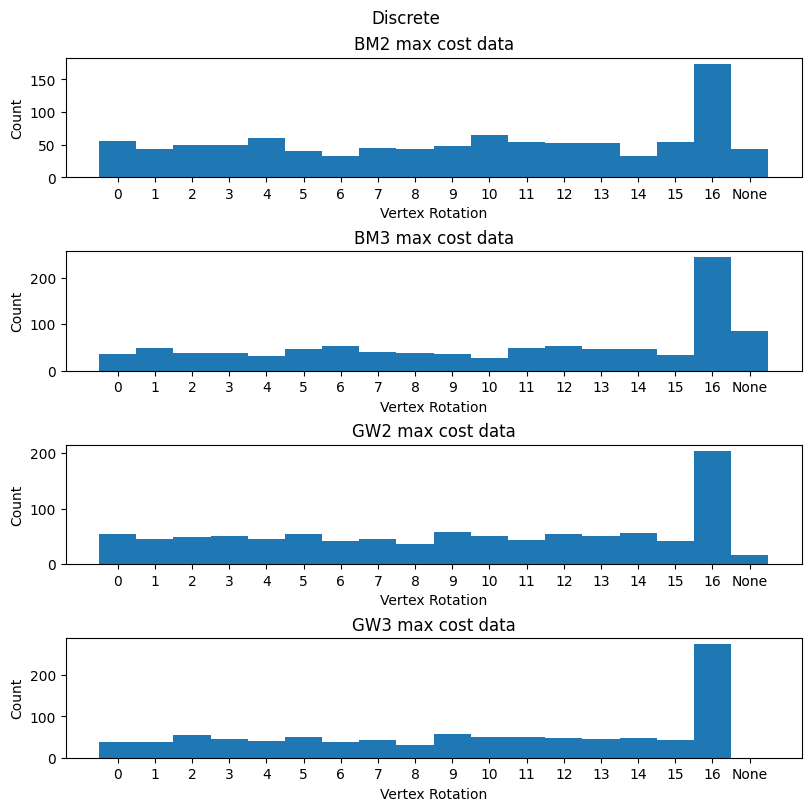

In [4]:
max_cost_hist("Discrete",p_data, path=r'Figures\RandomQUBODiscrete\Max_Cost_Hist')

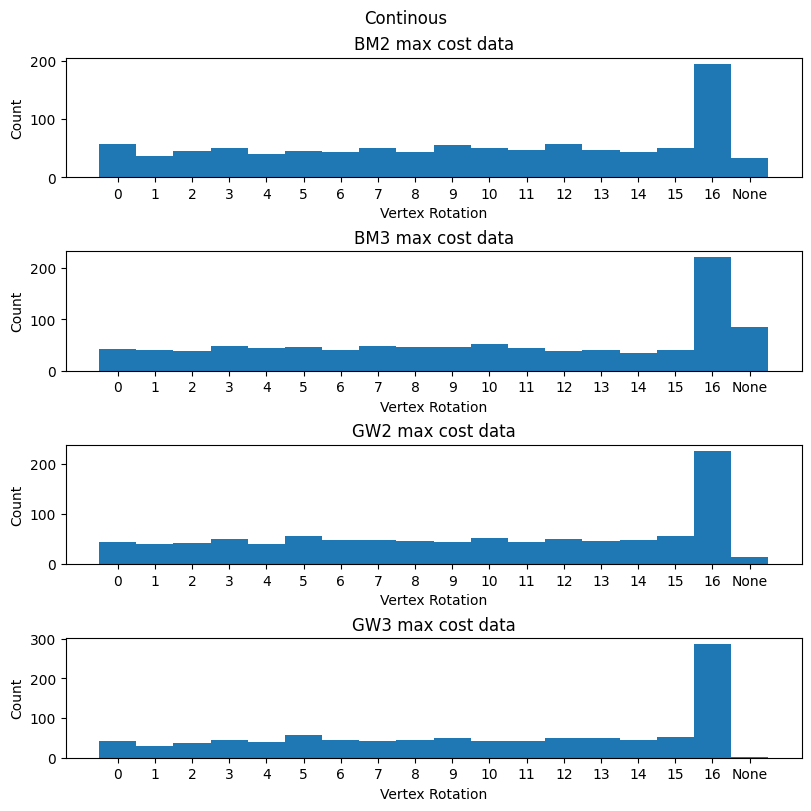

In [5]:
max_cost_hist("Continous",p_data, path=r'Figures\RandomQUBOContinous\Max_Cost_Hist')

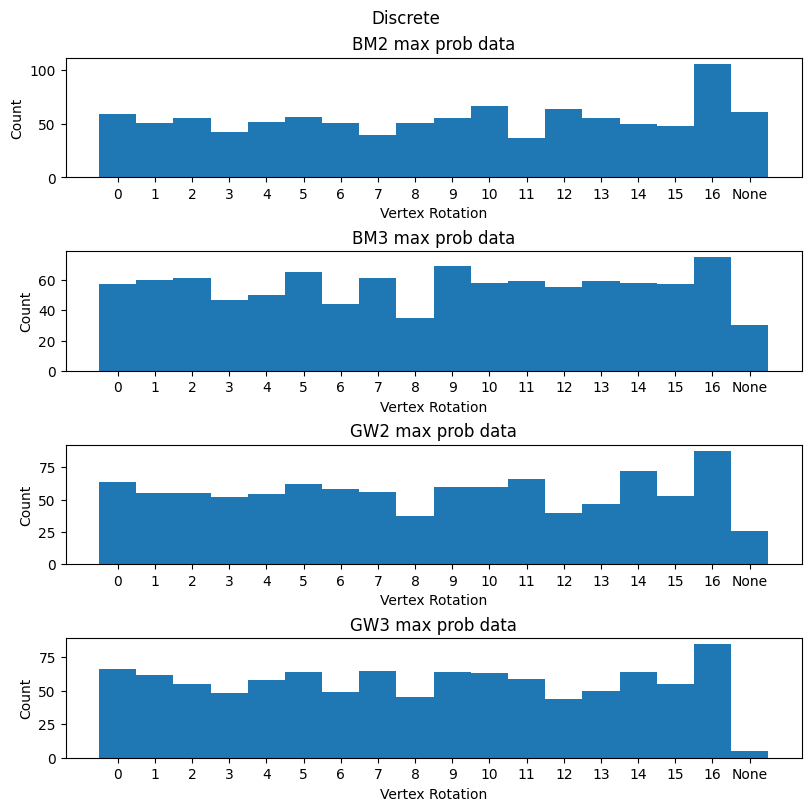

In [6]:
max_prob_hist("Discrete",p_data, path=r'Figures\RandomQUBODiscrete\Max_Prob_Hist')

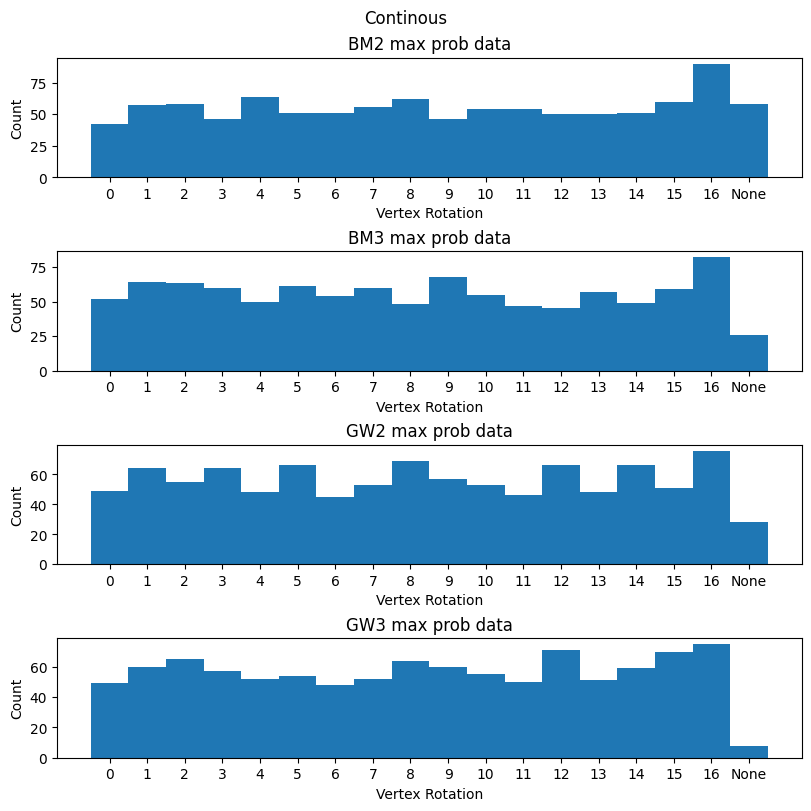

In [7]:
max_prob_hist("Continous",p_data, path=r'Figures\RandomQUBOContinous\Max_Prob_Hist')

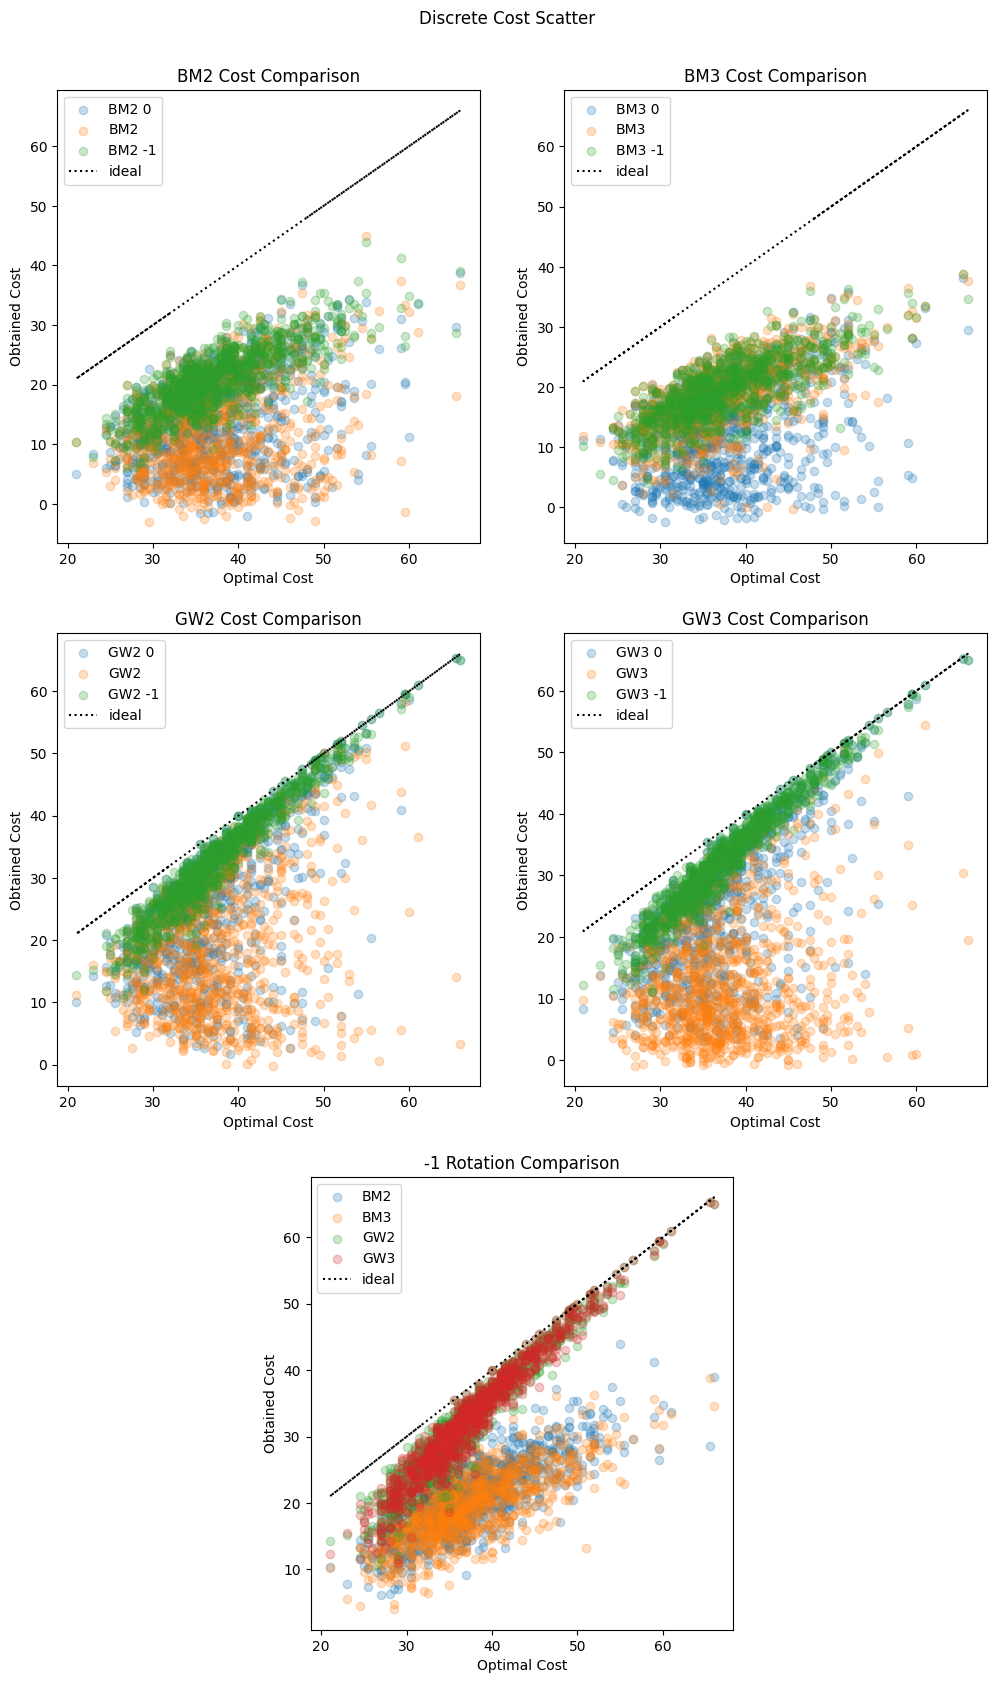

In [8]:
cost_scatter("Discrete",p_data, path=r'Figures\RandomQUBODiscrete\Cost_Scatter')

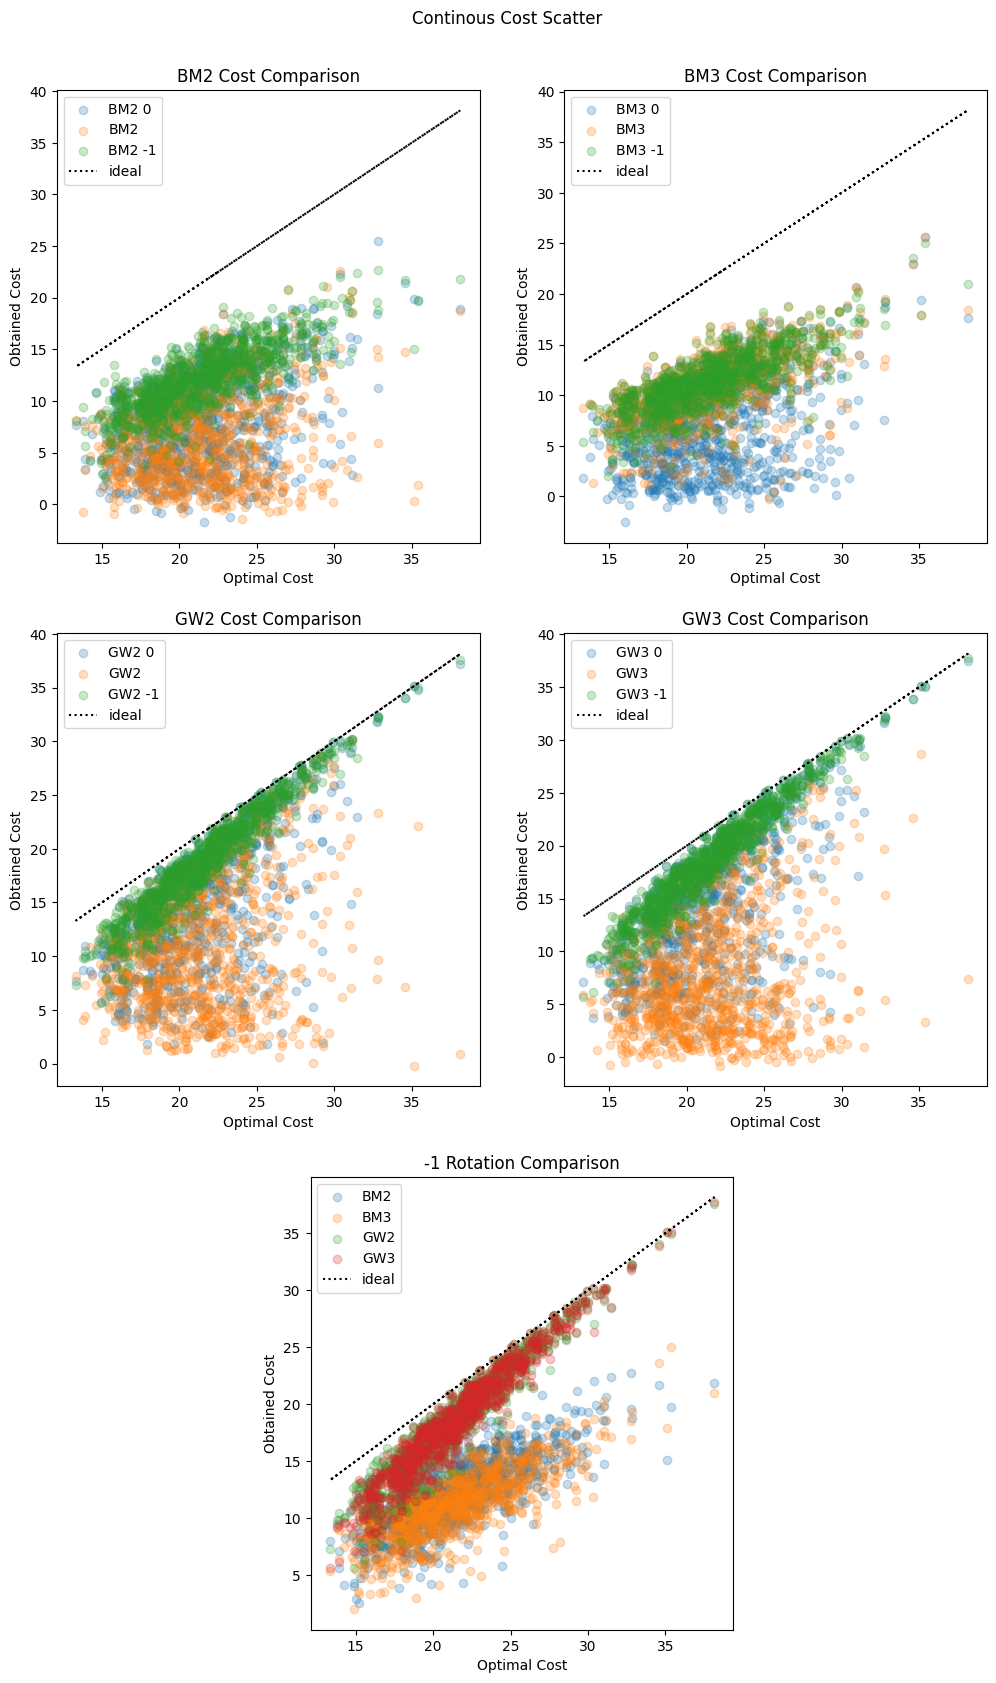

In [9]:
cost_scatter("Continous",p_data, path=r'Figures\RandomQUBOContinous\Cost_Scatter')

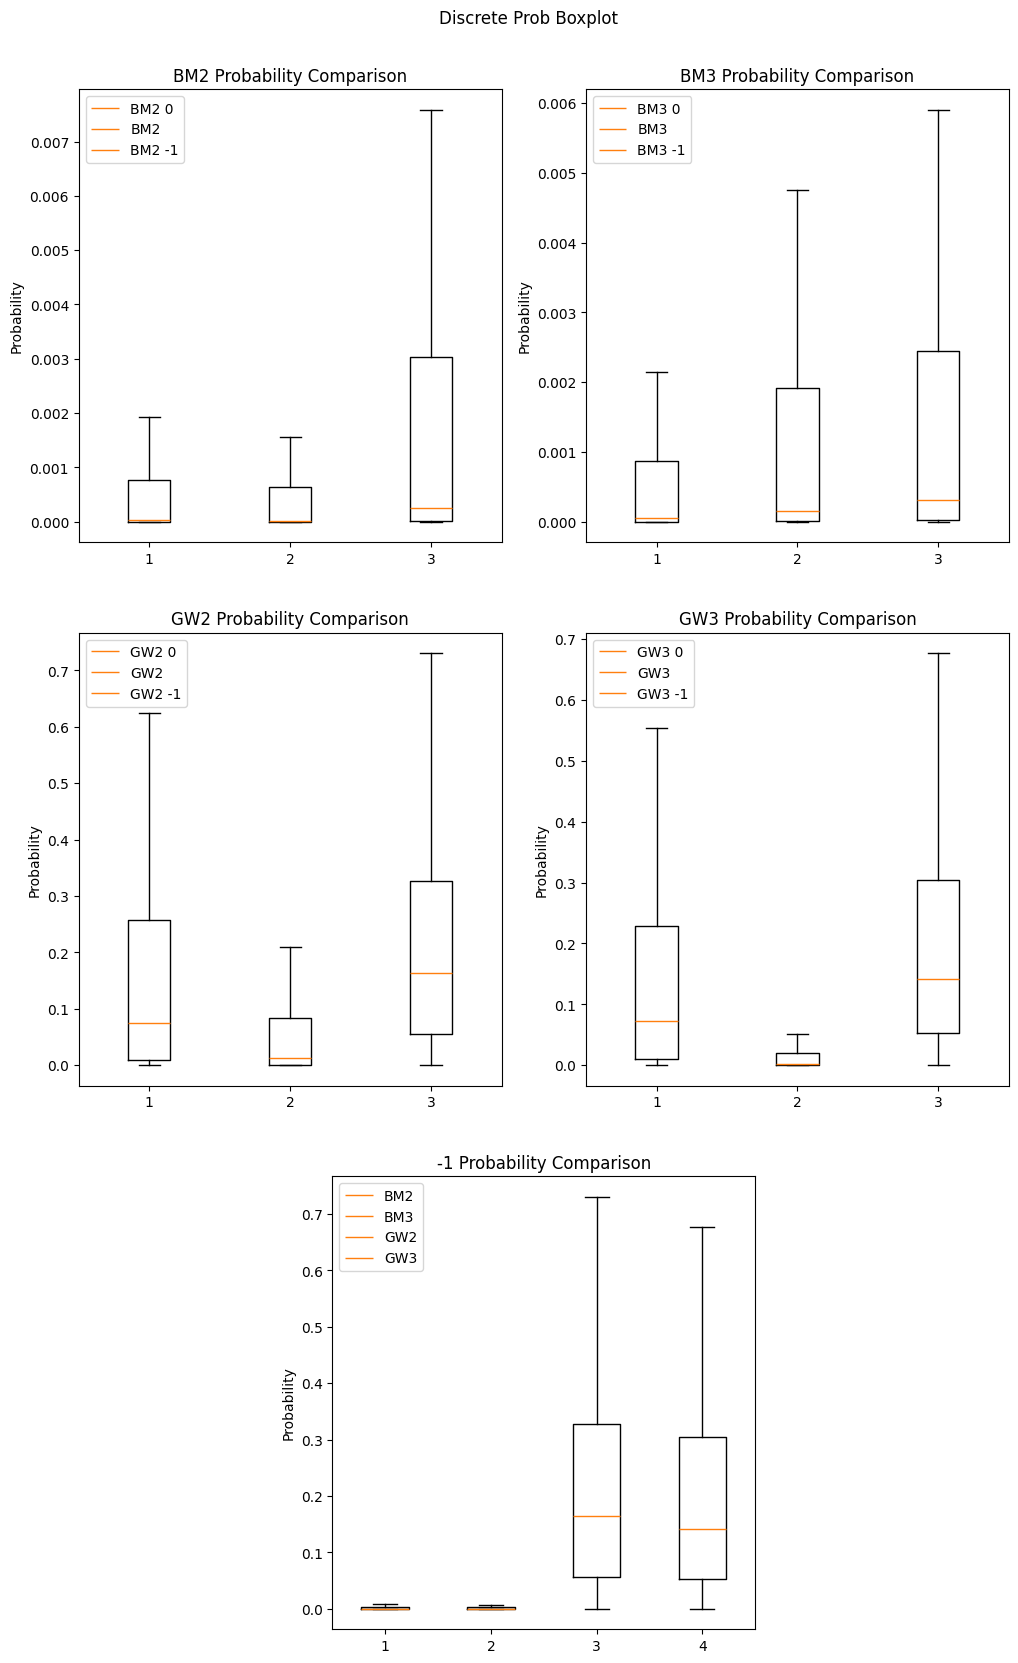

In [10]:
prob_boxplot("Discrete", p_data, path=r'Figures\RandomQUBODiscrete\Prob_BoxPlot')

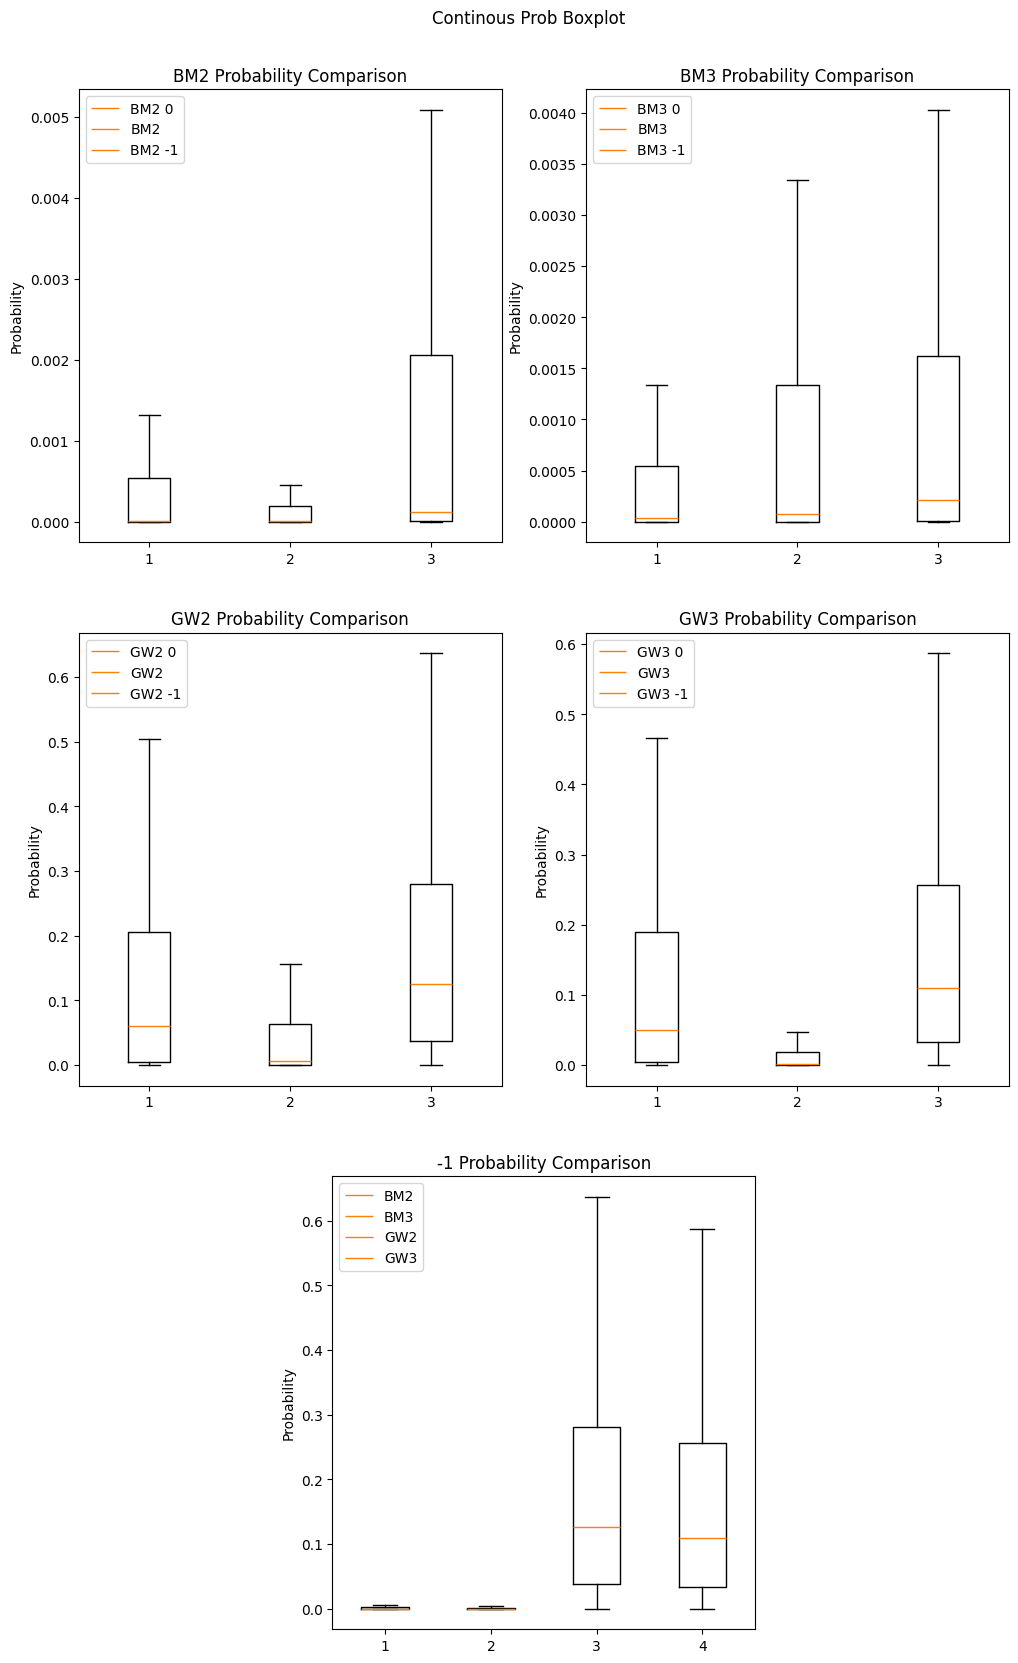

In [11]:
prob_boxplot("Continous", p_data, path=r'Figures\RandomQUBOContinous\Prob_BoxPlot')

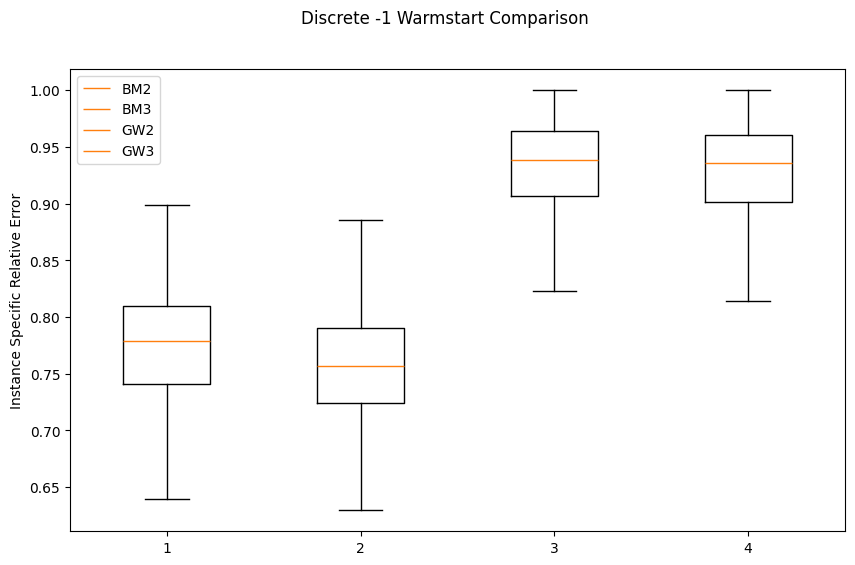

In [12]:
final_boxplot("Discrete", p_data, path=r'Figures\RandomQUBODiscrete\Comparison_Boxplot')

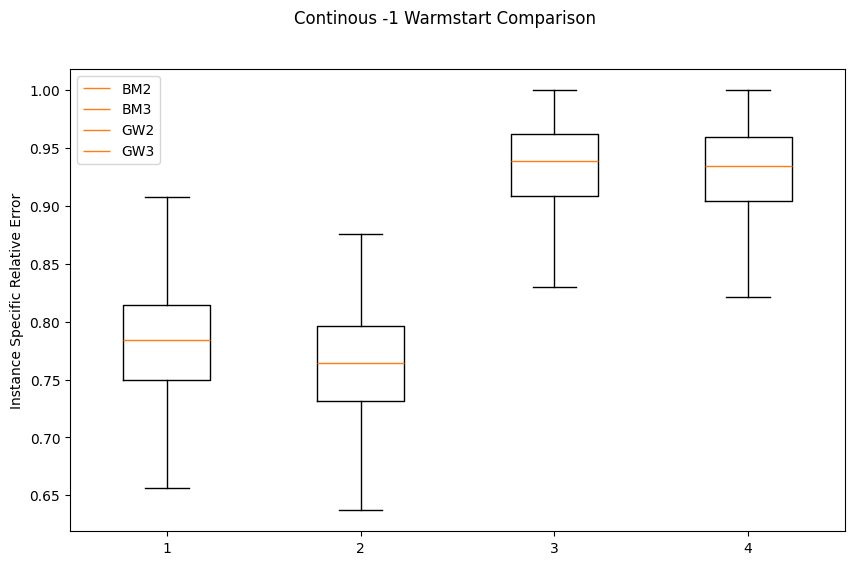

In [13]:
final_boxplot("Continous", p_data, path=r'Figures\RandomQUBOContinous\Comparison_Boxplot')

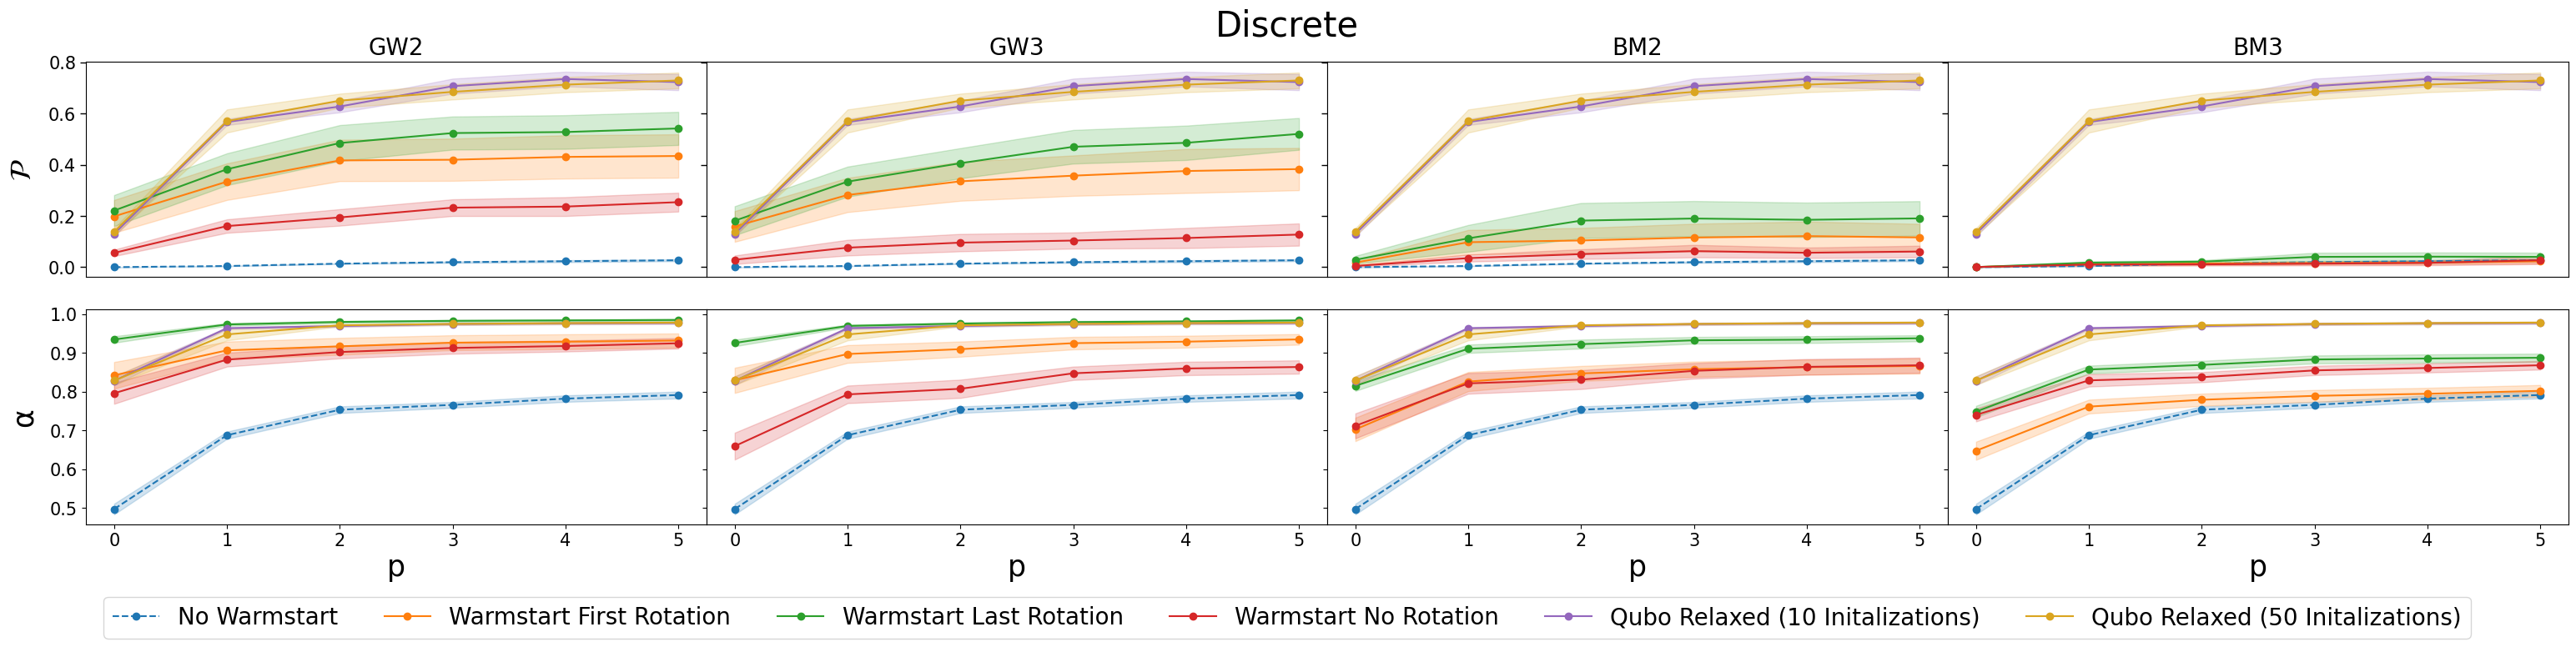

In [4]:
get_depth_combined('Discrete', idx_dict, PSC_DATA, DATA, PSC_DATA50, M_list, A_list, path=r'Figures\RandomQUBODiscrete\Full_Comparison', p_max=5, std=.25)

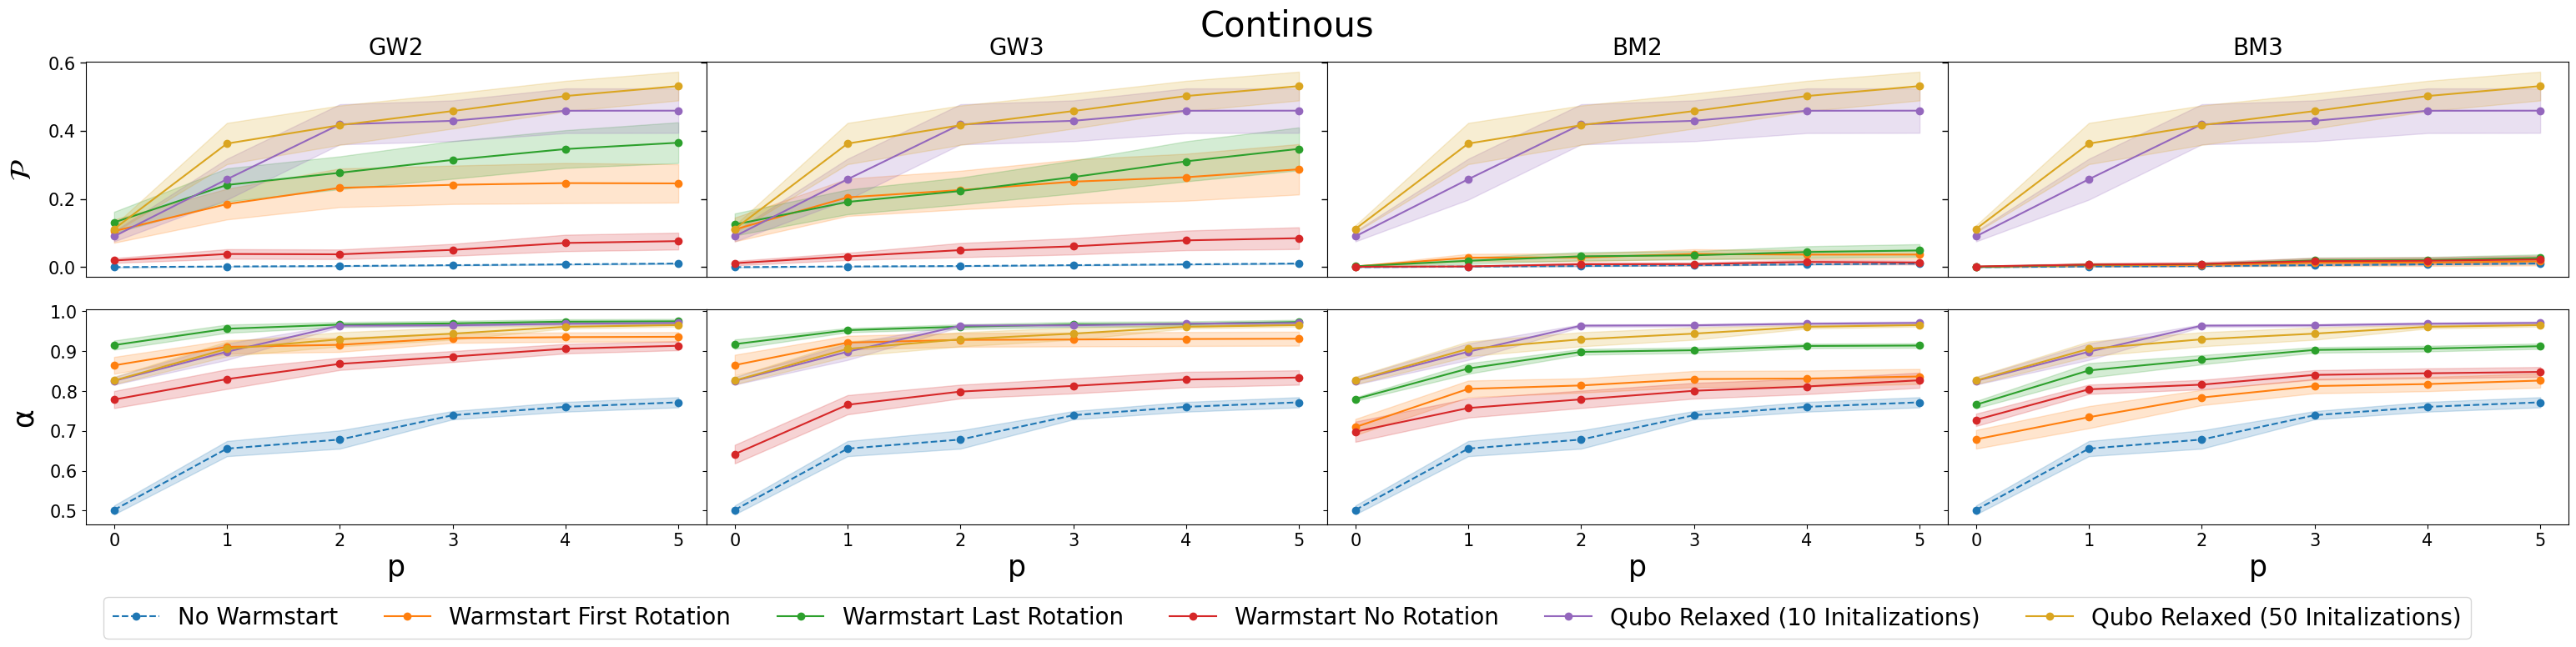

In [5]:
get_depth_combined('Continous', idx_dict, PSC_DATA, DATA, PSC_DATA50, M_list, A_list, path=r'Figures\RandomQUBOContinous\Full_Comparison', p_max=5, std=.25)

In [6]:
def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Overlay histograms with different colors and transparency
    ax.hist(DistanceDATA, edgecolor='black', density=True, alpha=0.5, color='blue', label=prob1)
    ax.hist(VdistanceDATA, edgecolor='black', density=True, alpha=0.5, color='orange', label=prob2)
    
    # Set labels and legend
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc="upper right")
    
    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout()
    plt.show()

In [25]:
def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Plot histograms as outline (step) with different line styles and colors
    ax.hist(DistanceDATA, bins=30, density=True, histtype='step', linestyle='-', color='blue', linewidth=1.5, label=prob1)
    ax.hist(VdistanceDATA, bins=30, density=True, histtype='step', linestyle='-', color='red', linewidth=1.5, label=prob2)
    
    # Set labels and legend
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc="upper right")
    
    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout()
    plt.show()

In [18]:
import matplotlib.pyplot as plt

def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # 2 rows, 1 column
    fig.suptitle(prob, fontsize=16)
    
    # Top plot
    ax1.hist(DistanceDATA, edgecolor='black', density=True)
    ax1.set_title(f"{prob1}")
    ax1.set_xlabel('Distance', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    
    # Bottom plot
    ax2.hist(VdistanceDATA, edgecolor='black', density=True)
    ax2.set_title(f"{prob2}")
    ax2.set_xlabel('Distance', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)

    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()


In [31]:
def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Stacked histogram
    ax.hist([DistanceDATA, VdistanceDATA], edgecolor='black', density=True, stacked=True, label=[prob1, prob2])
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc='upper left')
    
    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.999])
    plt.show()

In [14]:
def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Plot the histograms without specifying bins, so each dataset uses automatic binning
    ax.hist(DistanceDATA, edgecolor='black', density=True, alpha=.1, label=prob1)
    ax.hist(VdistanceDATA, edgecolor='black', density=True, alpha=.1, label=prob2)
    
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(loc='upper right')
    
    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.999])
    plt.show()

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Automatically determine bin edges based on combined data
    all_data = np.concatenate((DistanceDATA, VdistanceDATA))
    bin_edges = np.histogram_bin_edges(all_data)
    
    # Calculate histograms for both datasets with the same binning
    distance_hist, _ = np.histogram(DistanceDATA, bins=bin_edges, density=True)
    vdistance_hist, _ = np.histogram(VdistanceDATA, bins=bin_edges, density=True)
    
    # Calculate the bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Plot each histogram with dynamic opacity
    for i, (d_freq, v_freq) in enumerate(zip(distance_hist, vdistance_hist)):
        if d_freq < v_freq:
            # DistanceDATA in front, VdistanceDATA in back
            ax.bar(bin_centers[i], v_freq, width=bin_edges[i+1] - bin_edges[i], color='blue', alpha=.8, edgecolor='black')
            ax.bar(bin_centers[i], d_freq, width=bin_edges[i+1] - bin_edges[i], color='orange', alpha=1, edgecolor='black')
        else:
            # VdistanceDATA in front, DistanceDATA in back
            ax.bar(bin_centers[i], d_freq, width=bin_edges[i+1] - bin_edges[i], color='orange', alpha=1, edgecolor='black')
            ax.bar(bin_centers[i], v_freq, width=bin_edges[i+1] - bin_edges[i], color='blue', alpha=0.8, edgecolor='black')
    
    # Labels and legend
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend([prob1, prob2], loc='upper right')

    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.999])
    plt.show()


In [12]:
def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Automatically determine bin edges based on combined data
    all_data = np.concatenate((DistanceDATA, VdistanceDATA))
    bin_edges = np.histogram_bin_edges(all_data)
    
    # Calculate histograms for both datasets with the same binning
    distance_hist, _ = np.histogram(DistanceDATA, bins=bin_edges, density=True)
    vdistance_hist, _ = np.histogram(VdistanceDATA, bins=bin_edges, density=True)
    
    # Calculate the bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Plot each histogram with a solid bar for the background and a solid line for the foreground
    for i, (d_freq, v_freq) in enumerate(zip(distance_hist, vdistance_hist)):
        bar_width = bin_edges[i + 1] - bin_edges[i]
        if d_freq < v_freq:
            # DistanceDATA in front with line, VdistanceDATA in back with solid bar
            ax.bar(bin_centers[i], v_freq, width=bar_width, color='blue', alpha=1, edgecolor='black')
            ax.plot([bin_centers[i] - bar_width / 2, bin_centers[i] + bar_width / 2], [d_freq, d_freq], 
                    color='orange', linewidth=2)
        else:
            # VdistanceDATA in front with line, DistanceDATA in back with solid bar
            ax.bar(bin_centers[i], d_freq, width=bar_width, color='orange', alpha=1, edgecolor='black')
            ax.plot([bin_centers[i] - bar_width / 2, bin_centers[i] + bar_width / 2], [v_freq, v_freq], 
                    color='blue', linewidth=2)

    # Labels and custom legend
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Create custom legend handles
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=2, label=prob1),
        plt.Line2D([0], [0], color='orange', linewidth=2, label=prob2)
    ]
    ax.legend(handles=handles, loc='upper right', frameon=True)

    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.999])
    plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="Distance", prob2="VDistance", path=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Automatically determine bin edges based on combined data
    all_data = np.concatenate((DistanceDATA, VdistanceDATA))
    bin_edges = np.histogram_bin_edges(all_data)
    
    # Calculate histograms for both datasets with the same binning
    distance_hist, _ = np.histogram(DistanceDATA, bins=bin_edges, density=True)
    vdistance_hist, _ = np.histogram(VdistanceDATA, bins=bin_edges, density=True)
    
    # Calculate the bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Use the default color cycle
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Plot each histogram with a solid bar for the background and a line for the foreground
    for i, (d_freq, v_freq) in enumerate(zip(distance_hist, vdistance_hist)):
        bar_width = bin_edges[i + 1] - bin_edges[i]
        if d_freq < v_freq:
            # DistanceDATA in front with line, VdistanceDATA in back with solid bar
            ax.bar(bin_centers[i], v_freq, width=bar_width, color=colors[0], alpha=1, edgecolor='black')  # Use first color
            ax.plot([bin_centers[i] - bar_width / 2, bin_centers[i] + bar_width / 2], [d_freq, d_freq], 
                    color=colors[1], linewidth=2, linestyle = '--')  # Use second color
        else:
            # VdistanceDATA in front with line, DistanceDATA in back with solid bar
            ax.bar(bin_centers[i], d_freq, width=bar_width, color=colors[1], alpha=1, edgecolor='black')  # Use second color
            ax.plot([bin_centers[i] - bar_width / 2, bin_centers[i] + bar_width / 2], [v_freq, v_freq], 
                    color=colors[0], linewidth=2, linestyle = '--')  # Use first color

    # Labels and custom legend
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Create custom legend handles
    handles = [
        plt.Line2D([0], [0], color=colors[0], linewidth=2, label=prob1),
        plt.Line2D([0], [0], color=colors[1], linewidth=2, label=prob2)
    ]
    ax.legend(handles=handles, loc='upper right', frameon=True)

    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.999])
    plt.show()

# Example usage
# plot_distance("Probability Plot", np.random.normal(size=1000), np.random.normal(loc=1, size=1000))


In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distance(prob, DistanceDATA, VdistanceDATA, prob1="10 Initializations", prob2="50 Initializations", path=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(prob, fontsize=16)
    
    # Automatically determine bin edges based on combined data
    all_data = np.concatenate((DistanceDATA, VdistanceDATA))
    bin_edges = np.histogram_bin_edges(all_data)
    
    # Calculate histograms for both datasets with the same binning
    distance_hist, _ = np.histogram(DistanceDATA, bins=bin_edges, density=True)
    vdistance_hist, _ = np.histogram(VdistanceDATA, bins=bin_edges, density=True)
    
    # Calculate the bin centers for plotting
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Use the default color cycle
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Plot each histogram with a solid bar for the background and a dashed line for the foreground
    for i, (d_freq, v_freq) in enumerate(zip(distance_hist, vdistance_hist)):
        bar_width = bin_edges[i + 1] - bin_edges[i]
        if d_freq < v_freq:
            # DistanceDATA in front with solid line, VdistanceDATA in back with edge color
            ax.bar(bin_centers[i], v_freq, width=bar_width, color='none', edgecolor=colors[0], linewidth=2)  # No fill for back
            ax.plot([bin_centers[i] - bar_width / 2, bin_centers[i] + bar_width / 2], [d_freq, d_freq], 
                    color=colors[1], linewidth=2, linestyle = '--')  # Solid line for front
        else:
            # VdistanceDATA in front with solid line, DistanceDATA in back with edge color
            ax.bar(bin_centers[i], d_freq, width=bar_width, color='none', edgecolor=colors[1], linewidth=2)  # No fill for back
            ax.plot([bin_centers[i] - bar_width / 2, bin_centers[i] + bar_width / 2], [v_freq, v_freq], 
                    color=colors[0], linewidth=2, linestyle = '--')  # Solid line for front

    # Labels and custom legend
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

    # Create custom legend handles
    handles = [
        plt.Line2D([0], [0], color=colors[0], linewidth=2, label=prob1),
        plt.Line2D([0], [0], color=colors[1], linewidth=2, label=prob2)
    ]
    ax.legend(handles=handles, loc='upper right', frameon=True)

    # Save the figure if a path is specified
    if path is not None:
        plt.savefig(path + ".pdf", dpi=300)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.999])
    plt.show()

# Example usage
# plot_distance("Probability Plot", np.random.normal(size=1000), np.random.normal(loc=1, size=1000))


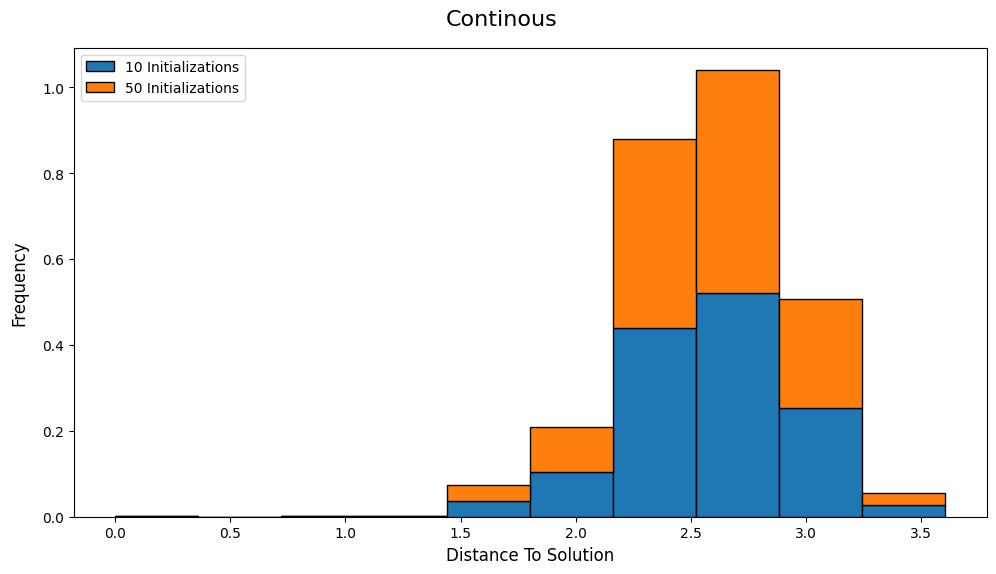

In [6]:
plot_distance("Continous", DISTANCE10_cont, DISTANCE50_cont, path=r'Figures\RandomQUBOContinous\Hypercube')

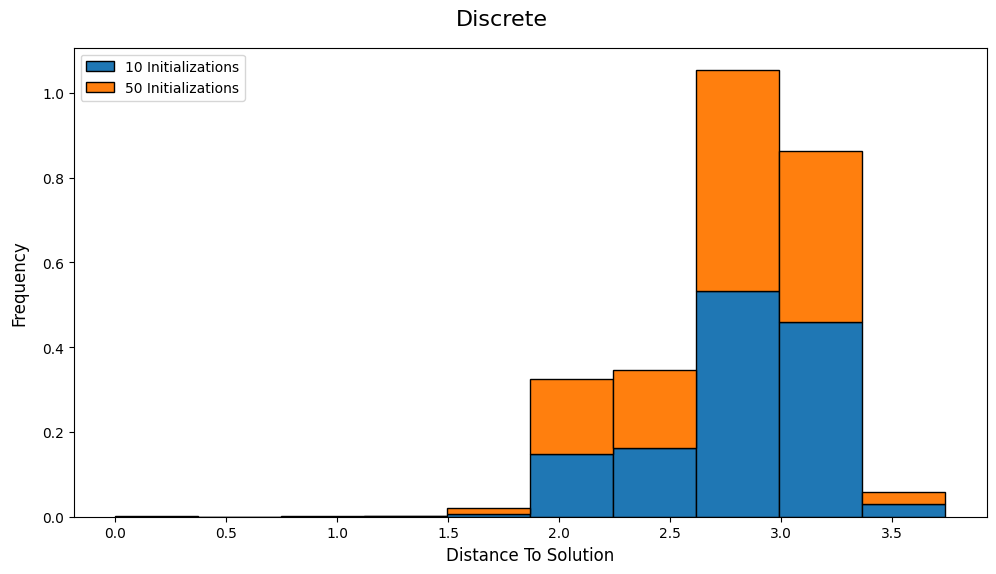

In [7]:
plot_distance("Discrete", DISTANCE10_disc, DISTANCE50_disc, path=r'Figures\RandomQUBODiscrete\Hypercube')